In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import tensorflow as tf

In [3]:
model = Sequential([
    Flatten(input_shape=(480, 640, 3)),
    Dense(26, activation='softmax')
])

model.compile(
    optimizer='sgd',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

datagen = ImageDataGenerator(rescale=1./255)
train_generator = datagen.flow_from_directory(
    'training_data',
    target_size=(480, 640),
    batch_size=10,
    class_mode='categorical',
    classes=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
)

model.fit(train_generator, epochs=15)

model.save('model_prototype.h5')

Found 5119 images belonging to 26 classes.


/home/nitin/anaconda3/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/15


/home/nitin/anaconda3/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


512/512 ━━━━━━━━━━━━━━━━━━━━ 63s 121ms/step - accuracy: 0.0422 - loss: 4008.1897
Epoch 2/15
512/512 ━━━━━━━━━━━━━━━━━━━━ 61s 117ms/step - accuracy: 0.1190 - loss: 2955.7231
Epoch 3/15
512/512 ━━━━━━━━━━━━━━━━━━━━ 59s 115ms/step - accuracy: 0.2293 - loss: 1932.9410
Epoch 4/15
512/512 ━━━━━━━━━━━━━━━━━━━━ 61s 118ms/step - accuracy: 0.4753 - loss: 855.4783
Epoch 5/15
512/512 ━━━━━━━━━━━━━━━━━━━━ 61s 117ms/step - accuracy: 0.6399 - loss: 423.9066
Epoch 6/15
512/512 ━━━━━━━━━━━━━━━━━━━━ 60s 117ms/step - accuracy: 0.7954 - loss: 170.3431
Epoch 7/15
512/512 ━━━━━━━━━━━━━━━━━━━━ 61s 118ms/step - accuracy: 0.9209 - loss: 35.0356
Epoch 8/15
512/512 ━━━━━━━━━━━━━━━━━━━━ 58s 112ms/step - accuracy: 0.9010 - loss: 47.4757
Epoch 9/15
512/512 ━━━━━━━━━━━━━━━━━━━━ 61s 118ms/step - accuracy: 0.9488 - loss: 19.7713
Epoch 10/15
512/512 ━━━━━━━━━━━━━━━━━━━━ 60s 116ms/step - accuracy: 0.9866 - loss: 2.2658
Epoch 11/15
512/512 ━━━━━━━━━━━━━━━━━━━━ 60s 116ms/step - accuracy: 0.9964 - loss: 0.5068
Epoch 12/15


In [7]:
datagen = ImageDataGenerator(rescale=1./255)
test_generator = datagen.flow_from_directory(
    'testing_data',
    target_size=(480, 640),
    batch_size=10,
    class_mode='categorical',
    classes=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
)

loss, accuracy = model.evaluate(test_generator)

Found 1289 images belonging to 26 classes.
129/129 ━━━━━━━━━━━━━━━━━━━━ 11s 85ms/step - accuracy: 0.9670 - loss: 4.8730


In [18]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    'testing_data',
    target_size=(480, 640),
    batch_size=10,
    class_mode='categorical',
    shuffle=False
)

y_predicted_probs = model.predict(test_generator)
y_predicted_labels = np.argmax(y_predicted_probs, axis=1)
y_true_labels = test_generator.classes

cm = tf.math.confusion_matrix(labels=y_true_labels, predictions=y_predicted_labels)


Found 1289 images belonging to 24 classes.
129/129 ━━━━━━━━━━━━━━━━━━━━ 11s 86ms/step


In [20]:
print(cm)

tf.Tensor(
[[63  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]
 [ 0 57  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]
 [ 0  0 57  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]
 [ 0  0  0 56  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]
 [ 5  1  0  3 63  0  0  0  4  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]
 [ 0  0  0  0  0 76  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]
 [ 0  0  0  0  0  0 48  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]
 [ 0  0  0  0  0  0  0 44  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]
 [ 0  0  0  0  0  0  0  0 52  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]
 [ 0  0  0  0  0  0  0  0  0 52  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]
 [ 0  0  0  0  0  0  0  0  0  0 36  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 40  0  0  0  0  0  0  0  0  0  0  0
  

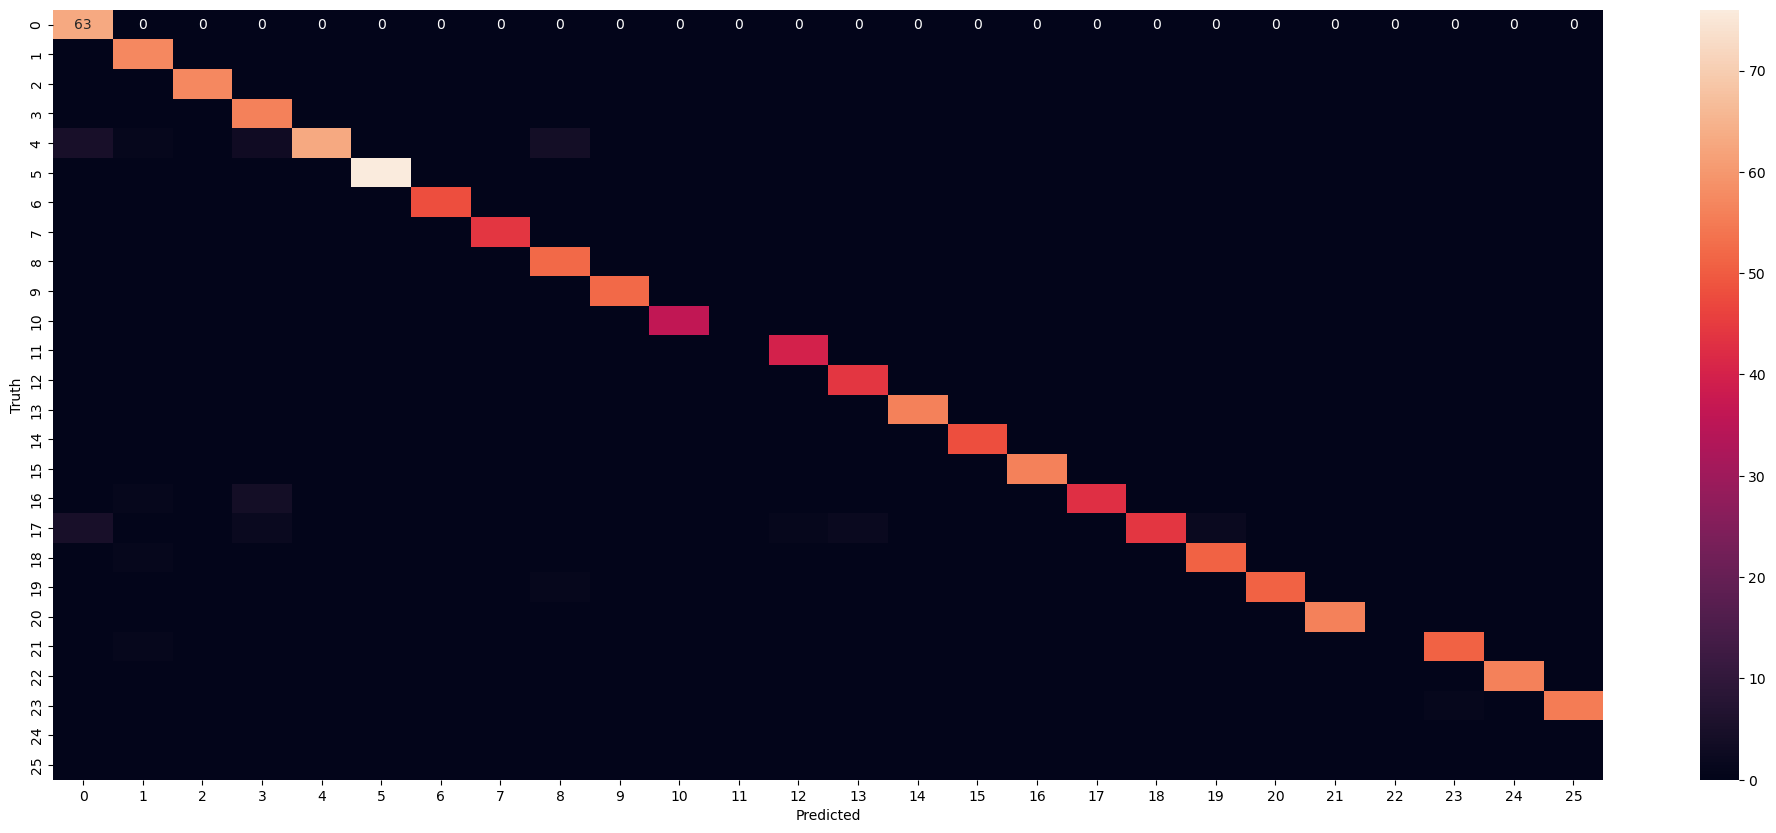

In [34]:
import seaborn as sn
import matplotlib.pyplot as plt 

plt.figure(figsize=(25, 10))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [ ]:
model.predict()